# Sudoku solver using genetic algorithm. 

This project is a sudoku solver that uses a genetic algorithm from "pygad" package. 
<br />
The program is not 100% accurate, so it does not solve sudokus perfectly, however it does its job pretty well considering that genetic algorithm is not the best fit for a sudoku solving algorithm.

In [581]:
import numpy as np
import pygad


## Define gene space and initial input

In [582]:
gene_space = [1, 2, 3, 4, 5, 6, 7, 8, 9]

initial_board = np.array([
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,3,0,8,5],
    [0,0,1,0,2,0,0,0,0],
    [0,0,0,5,0,7,0,0,0],
    [0,0,4,0,0,0,1,0,0],
    [0,9,0,0,0,0,0,0,0],
    [5,0,0,0,0,0,0,7,3],
    [0,0,2,0,1,0,0,0,0],
    [0,0,0,0,4,0,0,0,9]
])

## Fitness function:

It iterates through rows, columns and subgrids, and also checks if the number is the same as in initial board.
<br />
Based on those validation loops it gives fitness points. There is a penalty for mutating the numbers that are initially on the board.
<br />
<br />
The best fitness the function can return is 0. Every -2 indicates a mistake that has been made. There is a -20 fitness points penalty for changing a number (that is not a 0 as it indicates an empty cell) that comes from the initial input but the algorithm works well enough to never change those numbers.

In [583]:
def fitness_function(solution, solution_idx):
    # Reshape the solution to a 9x9 board as the solution comes as a flattened array
    board = solution.reshape((9, 9))
    fitness = 0

    # Check rows
    for row in board:
        unique_row = np.unique(row)
        fitness += (9 - len(unique_row)) * 2

    # Check columns
    for j in range(9):
        column = []
        for i in range(9):
            column.append(board[i][j])
        unique_column = np.unique(column)
        fitness += (9 - len(unique_column)) * 2

    # Check subgrids
    for box_i in range(3):
        for box_j in range(3):
            subgrid = []
            for i in range(3):
                for j in range(3):
                    subgrid.append(board[3*box_i + i][3*box_j + j])
            unique_subgrid = np.unique(subgrid)
            fitness += (9 - len(unique_subgrid)) * 2

    # Check initial board changes
    for i in range(9):
        for j in range(9):
            if initial_board[i][j] != 0 and board[i][j] != initial_board[i][j]:
                fitness += 20
    # Not returning the fitness with a minus makes the result be completely off giving a lot of repetitions
    return -fitness

## Create instance of a custom genetic algorithm that is an extension of pygad.GA

The only viable parent selection methods were sss (steady-state selection), rank (rank selection). Tournament method gave better results than most, but worse than sss and rank. The rest of the methods gave very unsatisfying results. The best number of parents mating doesn't really make a difference in the range between 1 and 5. The lower the mutation probability the faster the algorithm, however it's also less accurate. 4% mutation seemed as most accurate. Rising the percentage up to 10% made the fitness score double.

In [584]:
ga_instance = pygad.GA(
    initial_population=None,
    num_generations=1000,
    num_parents_mating=5,
    fitness_func=fitness_function,
    sol_per_pop=50,
    num_genes=81,
    gene_space=gene_space,
    mutation_probability=0.04,
    parent_selection_type="sss"
)

## Run the genetic algorithm and plot the fitness progress

Despite small changes after about 600 generations, it still sometimes makes a difference at the end of running the script therefore num_generations property is set to 1000. Going above 1000 does not make a significant difference in fitness score but it adds a ton of time consumptions.

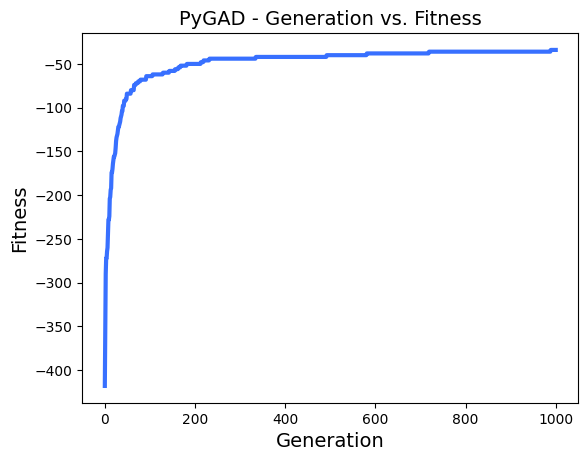

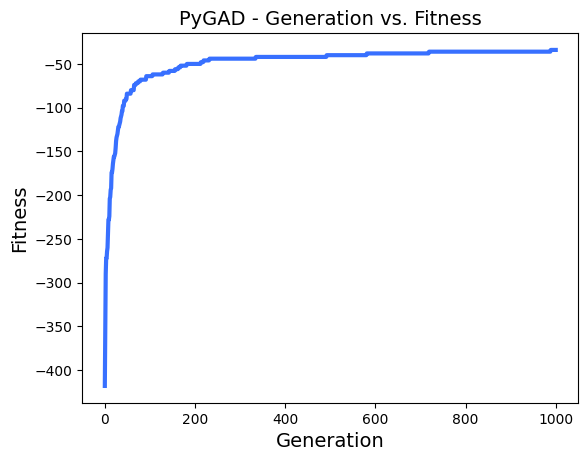

In [585]:
ga_instance.run()
ga_instance.plot_fitness()

### Print best solution fitness

In [586]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Fitness value of the best solution = -34


### Print a board that is reshaped into a 9 by 9 2D array

In [587]:
board = solution.reshape((9, 9))
print(board)

[[7. 8. 6. 4. 3. 5. 9. 1. 2.]
 [9. 4. 2. 6. 1. 3. 7. 8. 5.]
 [5. 3. 1. 9. 2. 7. 8. 6. 4.]
 [3. 1. 8. 5. 9. 7. 4. 2. 7.]
 [2. 5. 4. 3. 7. 8. 1. 9. 6.]
 [6. 9. 7. 1. 6. 2. 3. 5. 8.]
 [5. 6. 9. 7. 8. 4. 2. 7. 3.]
 [8. 7. 2. 2. 1. 9. 6. 4. 1.]
 [1. 2. 3. 3. 4. 6. 5. 8. 9.]]


# Results

100 Medium difficulty fitness results 
<br />
<br />
*Fitness on average: -31.16*
<br />
*Time on average: 15.9s* 

<br />

100 Hard difficulty fitness results
<br />
<br />
*Fitness on average: -31.58*
<br />
*Time on average: 16.1s*
<br />
<br />


The fitness for hard difficulty cases is slightly lower than in medium difficulty boards. The algorithm doesn't work perfectly so it doesn't solve the sudoku. On average he makes 15 mistakes. It does not mean that it gets 15 numbers wrong, but it gets 15 mistakes, where 1 number can make 3 mistakes: row, column, subgrid


## The algorithm run the same time both for medium and hard problems. The fitness results are the same as well.

Given arrays of results for medium and hard sudoku boards with indexes array to print:

In [588]:
indexes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]

hard_results = [-28, -28, -26, -26, -30, -26, -32, -26, -32, -26, -30, -32, -30, -30, -26, -28, -28, -32, -32, -32, -32, -26, -28, -26, -32, -32, -30, -26, -30, -32, -28, -28, -30, -26, -26, -26, -28, -28, -26, -26, -26, -30, -28, -28, -32, -26, -32, -28, -30, -30, -32, -30, -28, -26, -30, -26, -30, -32, -26, -30, -28, -26, -28, -28, -26, -26, -32, -26, -26, -28, -30, -32, -32, -32, -32, -32, -26, -30, -32, -26, -26, -26, -26, -28, -30, -26, -28, -28, -26, -32, -32, -30, -26, -30, -26, -26, -28, -32, -30, -32]

medium_results = [-30, -22, -28, -22, -28, -28, -22, -26, -28, -26, -22, -30, -26, -28, -24, -28, -22, -28, -30, -26, -26, -30, -30, -24, -26, -28, -26, -24, -22, -22, -24, -22, -24, -28, -22, -24, -22, -30, -22, -28, -24, -22, -22, -30, -24, -22, -26, -26, -24, -30, -26, -22, -26, -30, -26, -28, -30, -30, -30, -22, -26, -24, -26, -24, -28, -26, -24, -30, -22, -28, -24, -26, -24, -30, -30, -28, -30, -26, -26, -22, -24, -22, -26, -26, -22, -30, -30, -22, -30, -30, -22, -30, -28, -30, -24, -24, -30, -26, -22, -22]

print("Hard Sudoku Results")
for index, element in enumerate(hard_results):
    print(index, element)

print("Medium Sudoku Results")
for index, element in enumerate(medium_results):
    print(index, element)

Hard Sudoku Results
0 -28
1 -28
2 -26
3 -26
4 -30
5 -26
6 -32
7 -26
8 -32
9 -26
10 -30
11 -32
12 -30
13 -30
14 -26
15 -28
16 -28
17 -32
18 -32
19 -32
20 -32
21 -26
22 -28
23 -26
24 -32
25 -32
26 -30
27 -26
28 -30
29 -32
30 -28
31 -28
32 -30
33 -26
34 -26
35 -26
36 -28
37 -28
38 -26
39 -26
40 -26
41 -30
42 -28
43 -28
44 -32
45 -26
46 -32
47 -28
48 -30
49 -30
50 -32
51 -30
52 -28
53 -26
54 -30
55 -26
56 -30
57 -32
58 -26
59 -30
60 -28
61 -26
62 -28
63 -28
64 -26
65 -26
66 -32
67 -26
68 -26
69 -28
70 -30
71 -32
72 -32
73 -32
74 -32
75 -32
76 -26
77 -30
78 -32
79 -26
80 -26
81 -26
82 -26
83 -28
84 -30
85 -26
86 -28
87 -28
88 -26
89 -32
90 -32
91 -30
92 -26
93 -30
94 -26
95 -26
96 -28
97 -32
98 -30
99 -32
Medium Sudoku Results
0 -30
1 -22
2 -28
3 -22
4 -28
5 -28
6 -22
7 -26
8 -28
9 -26
10 -22
11 -30
12 -26
13 -28
14 -24
15 -28
16 -22
17 -28
18 -30
19 -26
20 -26
21 -30
22 -30
23 -24
24 -26
25 -28
26 -26
27 -24
28 -22
29 -22
30 -24
31 -22
32 -24
33 -28
34 -22
35 -24
36 -22
37 -30
38 -22
39 -2

# In conclusion

Genetic algorithm is not the best fit for sudoku solving problem. One of the problems was making the fitness function so that the initial board is not changed in the solution. This worked, however no matter the parameters the algorithm always made 10+ mistakes whether it was duplication in row, column or subgrid. Difference between 50 solutions in populations and 200 solutions in fitness score was very insignificant considering 400% improvement in time consumption. The best parent selection methods for this problem were steady-state, rank and tournament selection where the latter was worse than sss and rank methods, which were very similar.